# Data collection from Metacritic

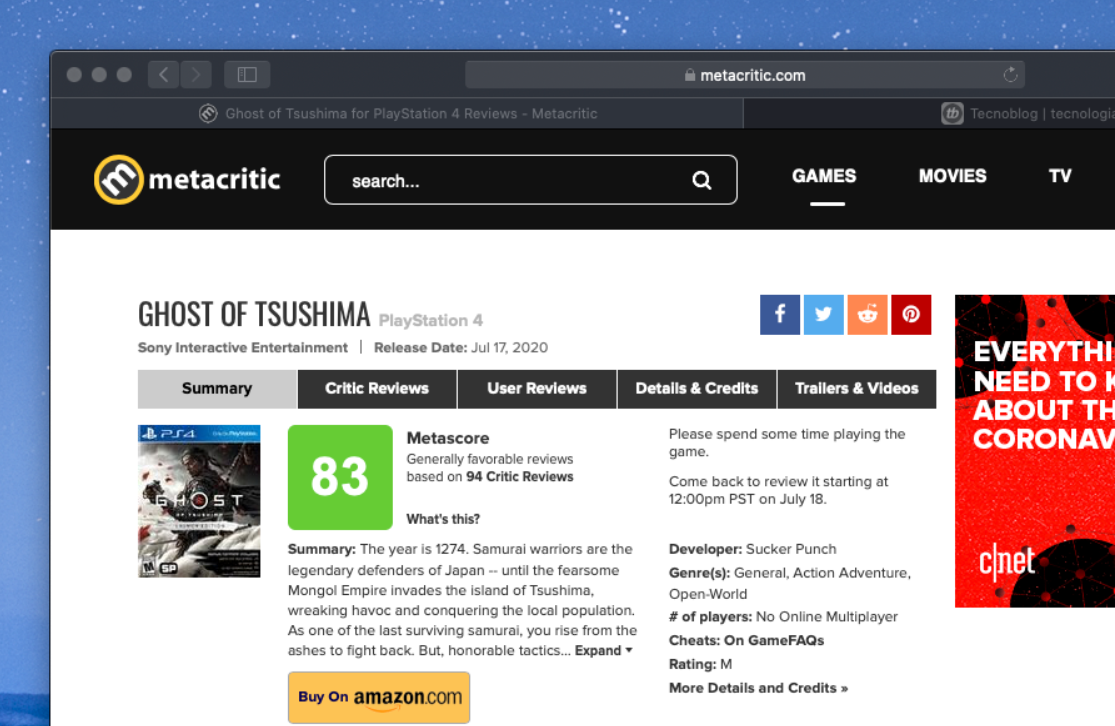

# Objetive 

*   After extracting the links referring to each game, we will access the page of each one and collect the main information available;
*   The expected outputs are information about each game, from the name to reviews made by the community.



# 1. Library imports

*   Pandas: responsible for data manipulation/analysis through the dataframe format;
*   re: module to perform matching operations (on text) through regular expressions ;
*   time: module used mainly for calculating processing time and creating delays;
*   requests: HTTP library used to download the page's source code;
*   bs4 (Beautiful Soup 4): library used to extract data from HTML and XML files, used as a parser to navigate within the files created by requests.
* tqdm: used to track the duration of loops ;
* glob: module responsible for identifying files in a folder;


In [ ]:
import pandas as pd
import re
import time
import requests as rq
import bs4 as bs4
import tqdm
import glob
import json

# 2. Data collection on each game page

### In this step, we will navigate through the page of each shoe and extract as much information as possible that can describe it in some analytical way.

In [ ]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Projetos/Recomendação jogos/parsed_games.json", lines=True)
lista_de_links = df['link'].unique()

* With the file created in the first process, we will rescue the unique link of each game;

In [ ]:
lista_de_links

array(['/game/nintendo-64/the-legend-of-zelda-ocarina-of-time',
       '/game/playstation/tony-hawks-pro-skater-2',
       '/game/playstation-3/grand-theft-auto-iv', ...,
       '/game/xbox-360/yaris', '/game/pc/ride-to-hell-retribution',
       '/game/wii-u/family-party-30-great-games-obstacle-arcade'],
      dtype=object)

*   The array obtained does not contain the complete link, so before we get the code for each page, we did the transformation to complete it

In [ ]:
url = "https://www.metacritic.com{link}"

for pos, link in enumerate(lista_de_links[:38]):
    urll = url.format(link=link)
    print(urll)
    response = rq.get(urll, headers={'User-Agent':'test'})
    with open("/content/drive/MyDrive/Colab Notebooks/Projetos/dados/game_{}.html".format(pos), 'w+') as output:
        output.write(response.text)
    time.sleep(1)

# 3. Processing of raw data

### When browsing the pages, we can see that there is a great diversity of information, as expected That said, several attempts and tests were made to arrive at the desired tags.


*   In glob, the sorted() function is used to sort the files in a similar way to what was sorted in the list of links;
*   The regex was also used to help search for specific texts;
*   Finally, the raw data was saved in JSON.

In [ ]:
with open("parsed_anuncio_info_completo.json", 'w+') as output:
    for anuncio in tqdm.tqdm_notebook(sorted(glob.glob("dados_rec\game*"))):
        try: 
            with open(anuncio, 'r+') as inp:
                page_html = inp.read()
                parsed = bs4.BeautifulSoup(page_html, 'html.parser')

               #Extracting information found in the code of each page
            
                product_name = parsed.find_all(class_="product_name")
                publisher = parsed.find_all(class_="summary_detail publisher")
                plataform = parsed.find_all(class_="platform")
                metascore = parsed.find_all(class_="metascore_wrap highlight_metascore")
                userscore = parsed.find_all(class_="userscore_wrap feature_userscore")
                developer = parsed.find_all(class_="summary_detail developer")
                genre = parsed.find_all(class_="summary_detail product_genre")
                players = parsed.find_all(class_="summary_detail product_players")
                rating = parsed.find_all(class_="summary_detail product_rating")
                release = parsed.find_all(class_="summary_detail release_data")

                data = dict()

                # joining everything and putting it in a string

                for e in product_name:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                for e in metascore:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                for e in userscore:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                for e in plataform:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                for e in publisher:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                for e in developer:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                for e in release:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()           

                for e in genre:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                for e in players:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                for e in rating:
                    colname = "_".join(e['class'])
                    data[colname] = e.text.strip()

                output.write("{}\n".format(json.dumps(data)))
        except Exception:
            pass 


# 4. Checking results

*   The data was successfully collected and the treatment will be done in the next step;




In [ ]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Projetos/Recomendação jogos/parsed_games_info.json", lines=True)


In [ ]:
df.head()

,product_title,metascore_wrap_highlight_metascore,userscore_wrap_feature_userscore,summary_detail_publisher,summary_detail_developer,platform,summary_detail_release_data,summary_detail_product_genre,summary_detail_product_players,summary_detail_product_rating
0,The Legend of Zelda: Ocarina of Time / Master ...,Metascore\n\n91\n\n\n\n\n ...,User Score\n8.9\n\nGenerally favorable reviews...,Publisher:\n\n\n ...,Developer:\n\nNintendo,GameCube,"Release Date:\nFeb 28, 2003","Genre(s): Action Adventure, ...",# of players:\n1 Player,Rating:\nE
1,Borderlands 2\n\n\n\n ...,Metascore\n\n91\n\n\n\n\n ...,User Score\n8.2\n\nGenerally favorable reviews...,Publisher:\n\n\n ...,Developer:\n\nGearbox Software,PlayStation 3,"Release Date:\nSep 18, 2012","Genre(s): Action, ...",# of players:\nUp to 4,Rating:\nM
2,The Good Life,Metascore\n\n91\n\n\n\n\n ...,User Score\n9.1\n\nUniversal acclaim- based on...,Publisher:\n\n\n ...,Developer:\n\nCD Projekt Red Studio,PlayStation 4,"Release Date:\nMay 30, 2016","Genre(s): Role-Playing, ...",# of players:\nNo Online Multiplayer,Rating:\nM
3,Babylon's Fall,Metascore\n\n91\n\n\n\n\n ...,User Score\n3.8\n\nGenerally unfavorable revie...,Publisher:\n\n\n ...,Developer:\n\nHeadgate,PC,"Release Date:\nSep 20, 2004","Genre(s): Sports, ...",# of players:\n1-8,Rating:\nE
4,ESPN NFL Football\n\n\n ...,Metascore\n\n91\n\n\n\n\n ...,User Score\n7.8\n\nGenerally favorable reviews...,Publisher:\n\n\n ...,Developer:\n\nVisual Concepts,Xbox,"Release Date:\nSep 3, 2003","Genre(s): Sports, ...",# of players:\n1-4,Rating:\nE
